In [110]:
import pandas as pd
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
#from helpers import slug
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
police_killings = pd.read_csv("police_killings.csv",encoding="ISO-8859-1")
police_killings.dtypes


name                     object
age                      object
gender                   object
raceethnicity            object
month                    object
day                       int64
year                      int64
streetaddress            object
city                     object
state                    object
latitude                float64
longitude               float64
state_fp                  int64
county_fp                 int64
tract_ce                  int64
geo_id                    int64
county_id                 int64
namelsad                 object
lawenforcementagency     object
cause                    object
armed                    object
pop                       int64
share_white              object
share_black              object
share_hispanic           object
p_income                 object
h_income                float64
county_income             int64
comp_income             float64
county_bucket           float64
nat_bucket              float64
pov     

In [111]:
counts=police_killings["raceethnicity"].value_counts()


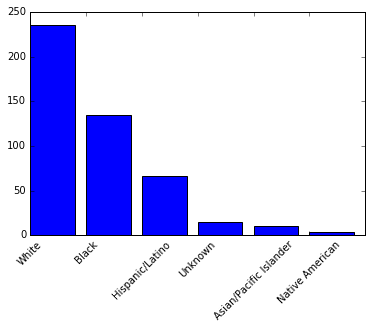

In [112]:
%matplotlib inline


plt.bar(range(6), counts)
plt.xticks(range(6), counts.index, rotation=45)
plt.show()

In [5]:
counts / sum(counts)


White                     0.505353
Black                     0.289079
Hispanic/Latino           0.143469
Unknown                   0.032120
Asian/Pacific Islander    0.021413
Native American           0.008565
Name: raceethnicity, dtype: float64

**On checking wikipedia site https://en.wikipedia.org/wiki/Race_and_ethnicity_in_the_United_States#Racial_makeup_of_the_U.S._population
we find that the population of Whites is nearly 55% still the account for 50% killing i.e 50/55 < 1 however African American population is only 16% but they have accounted for 28% of all killings at the time of collection of data 28/16 > 1
This means that the Population of Blacks is overrepresented here.**

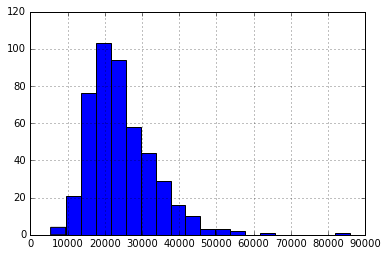

In [6]:

police_killings["p_income"][police_killings["p_income"] != "-"].astype(float).hist(bins=20)

In [7]:
police_killings["p_income"][police_killings["p_income"] != "-"].astype(float).median()

22348.0

**According to the Census, median personal income in the US is 28,567, and our median is 22,348, which means that shootings tend to happen in less affluent areas. But our sample size is small we can't generalize concepts**

In [8]:

income=police_killings["p_income"][police_killings["p_income"] != "-"]

In [9]:
state_pop = pd.read_csv("state_population.csv")
counts=police_killings["state_fp"].value_counts()
states = pd.DataFrame({"STATE":counts.index,"shootings":counts})


**Rate must be calculated per population in millions of each state to make sense mathematically.Only counting number of shootings without taking into account the total population will skew our results**

In [10]:
states = states.merge(state_pop, on="STATE")
states["pop_millions"] = states["POPESTIMATE2015"] / 1000000
states["rate"] = states["shootings"] / states["pop_millions"]

states.sort("rate")

/home/ashm8206/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,pop_millions,rate
43,9,1,40,1,1,Connecticut,3590886,2826827,78.7,3.590886,0.278483
22,42,7,40,1,2,Pennsylvania,12802503,10112229,79.0,12.802503,0.546768
38,19,2,40,2,4,Iowa,3123899,2395103,76.7,3.123899,0.640226
6,36,13,40,1,2,New York,19795791,15584974,78.7,19.795791,0.656705
29,25,5,40,1,1,Massachusetts,6794422,5407335,79.6,6.794422,0.735898
42,33,1,40,1,1,New Hampshire,1330608,1066610,80.2,1.330608,0.751536
45,23,1,40,1,1,Maine,1329328,1072948,80.7,1.329328,0.752260
11,17,11,40,2,3,Illinois,12859995,9901322,77.0,12.859995,0.855366
12,39,10,40,2,3,Ohio,11613423,8984946,77.4,11.613423,0.861073
31,55,5,40,2,3,Wisconsin,5771337,4476711,77.6,5.771337,0.866350


**The Southern states have higher police killings,states with lower african American popultion have lower rates as compared to states with higher population.Northern states have typically lower killings,with the exception of Oregon and Alaska**

In [11]:
pk=police_killings[(police_killings["share_white"]!='-')&(police_killings["share_black"]!='-')&(police_killings["share_hispanic"]!='-')]

In [12]:
pk["share_white"] = pk["share_white"].astype(float)
pk["share_black"] = pk["share_black"].astype(float)
pk["share_hispanic"] = pk["share_hispanic"].astype(float)

/home/ashm8206/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/ashm8206/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/ashm8206/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [13]:
lowest_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]
highest_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]

ls = pk[pk["state"].isin(lowest_states)]
hs = pk[pk["state"].isin(highest_states)]

In [14]:

columns = ["pop", "county_income", "share_white", "share_black", "share_hispanic"]

ls[columns].mean()

pop                4201.660714
county_income     54830.839286
share_white          60.616071
share_black          21.257143
share_hispanic       12.948214
dtype: float64

In [15]:
hs[columns].mean()

pop                4315.750000
county_income     48706.967391
share_white          55.652174
share_black          11.532609
share_hispanic       20.693478
dtype: float64

**It looks like the states with low rates of shootings tend to have a higher proportion of blacks in the population, and a lower proportion of hispanics in the census regions where the shootings occur. It looks like the income of the counties where the most shootings occur is lower.
States with high rates of shootings tend to have high hispanic population shares in the counties where shootings occur.This contradicts the widely our previous result that Blacks are overrepresented in police killings.**

In [16]:
hs.shape

(92, 34)

In [17]:
police_killings["armed"].value_counts()

Firearm               230
No                    102
Knife                  68
Other                  26
Vehicle                18
Non-lethal firearm     14
Unknown                 7
Disputed                2
Name: armed, dtype: int64

In [113]:
import numpy as np
p_k= pk.pivot_table(index ="state_fp",values="urate",aggfunc=np.mean)
p_k1= pk.pivot_table(index ="state_fp",values="college",aggfunc=np.mean)
states.set_index("STATE",drop=False,inplace=True)
states.sort("STATE")
states["urate"]=p_k
states["college"]=p_k1
rate_vs_urate= pd.DataFrame({"rate":states["rate"],"urate":states["urate"],"college":states["college"]})


/home/ashm8206/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


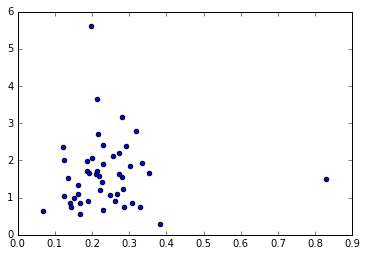

In [114]:
plt.scatter(rate_vs_urate["college"],rate_vs_urate["rate"])
plt.show()


**There seems to be no relation between rate of killings in the state and aggregate percentage per state of people who attented college**

In [20]:
shareb= pk.pivot_table(index ="state_fp",values="share_black",aggfunc=np.mean)
shareh= pk.pivot_table(index ="state_fp",values="share_hispanic",aggfunc=np.mean)
states["shareb"]=shareb
states["shareh"]=shareh

In [21]:
rate_vs_share =pd.DataFrame({"shareb":states["shareb"],"shareh":states["shareh"],"rate":states["rate"]})

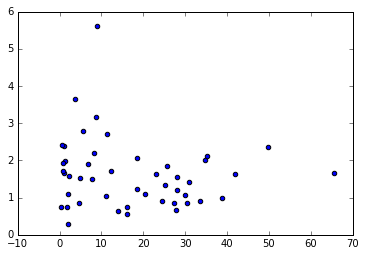

In [22]:
plt.scatter(rate_vs_share["shareb"],rate_vs_share["rate"])
plt.show()

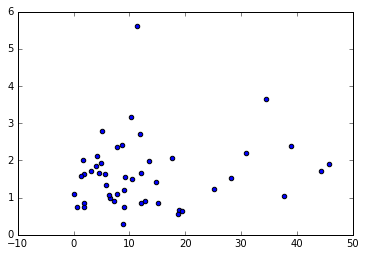

In [23]:
plt.scatter(rate_vs_share["shareh"],rate_vs_share["rate"])
plt.show()

**Looks like our initial hunch that more attacks take place where hispanic population is double African-American population is unsubstantiated. The above scatter plot proves both events are not correlated.**

In [24]:
st =pd.DataFrame({"state_fp":states["STATE"],"rate":states["rate"]})
pk = pk.merge(st,on="state_fp")

In [25]:
pk.columns

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college', 'rate'],
      dtype='object')

In [115]:
state_loc = pd.read_csv("state_latlon.csv")
state_loc.head()

,state,latitude,longitude,STATE
0,AK,61.3850,-152.2683,2
1,AL,32.7990,-86.8073,1
2,AR,34.9513,-92.3809,5
3,AZ,33.7712,-111.3877,4
4,CA,36.1700,-119.7462,6


In [116]:
states = states.merge(state_loc,on="STATE")
states.head()

,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,pop_millions,...,shareh,state_x,latitude_x,longitude_x,x,y,bin,state_y,latitude_y,longitude_y
0,6,74,40,4,9,California,39144818,30023902,76.7,39.144818,...,45.691892,CA,36.1700,-119.7462,3.517534e+05,1.556334e+06,2,CA,36.1700,-119.7462
1,48,47,40,3,7,Texas,27469114,20257343,73.7,27.469114,...,44.293617,TX,31.1060,-97.6475,2.283482e+06,6.980554e+05,2,TX,31.1060,-97.6475
2,12,29,40,3,5,Florida,20271272,16166143,79.7,20.271272,...,14.755172,FL,27.8333,-81.7170,3.854967e+06,4.239995e+05,1,FL,27.8333,-81.7170
3,4,25,40,4,8,Arizona,6828065,5205215,76.2,6.828065,...,34.444000,AZ,33.7712,-111.3877,1.031878e+06,1.127093e+06,5,AZ,33.7712,-111.3877
4,40,22,40,3,7,Oklahoma,3911338,2950017,75.4,3.911338,...,11.336364,OK,35.5376,-96.9247,2.362976e+06,1.188819e+06,8,OK,35.5376,-96.9247


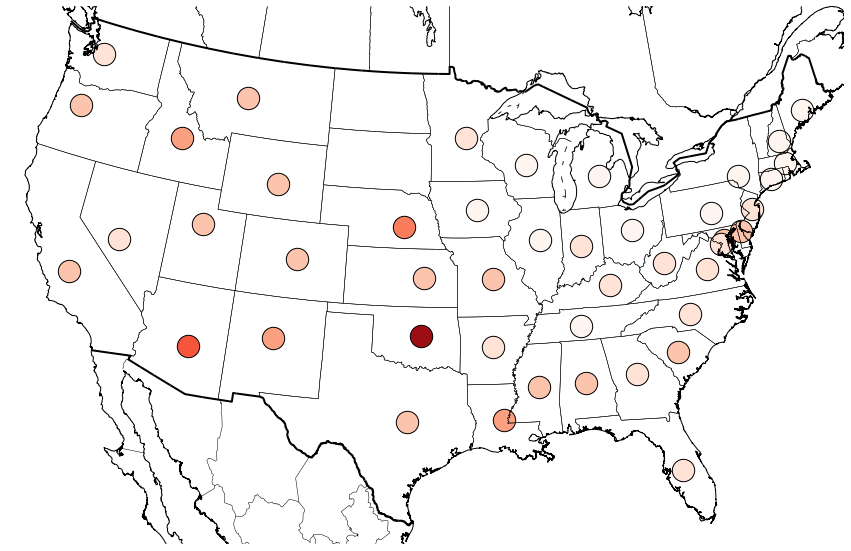

In [33]:
latitude = states["latitude"].tolist()
longitude = states["longitude"].tolist()
fig =plt.figure(figsize=(15,20))
ax = fig.add_subplot(111, axisbg='w', frame_on=False)

m = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64,
  urcrnrlat=49, projection='lcc', lat_1=33, lat_2=45,
  lon_0=-95, resolution='h', area_thresh=10000)
m.drawcoastlines()
m.drawcountries(linewidth=2)
m.drawstates()
x, y = m(longitude,latitude)
states["x"]=x
states["y"]=y
AllStates=states["STATE"]
AllStates = AllStates.tolist()

for x in AllStates:
    
    color =scheme[int(pk["bin"][pk["state_fp"]==x].head(1))]
    
    a = states[["x"]][states["STATE"]==x]
    b = states[["y"]][states["STATE"]==x]
    
#patches = [Polygon(np.array(shape), True)]
#pc = PatchCollection(patches)
#pc.set_facecolor(color)
#ax.add_collection(pc)
    m.scatter(a,b,s=500,c=color)
#ax.axhspan(500, 1500, facecolor='w', edgecolor='w', zorder=2)



plt.show()


**I have plotted a scatter plot using a csv that contains the latitudes and longitudes of each state for rate of police-killings**

In [99]:

num_colors=9
values = states["rate"]
#cmap_r = reverse_colourmap("autumn")
cm = plt.get_cmap("Reds")
scheme = [cm(i / num_colors) for i in range(num_colors)]
bins = np.linspace(values.min(), values.max(), num_colors)
states['bin'] = np.digitize(values, bins) - 1
states[states.columns[:12]].sort_values('rate', ascending=False).head(15)


,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,pop_millions,rate,urate
4,40,22,40,3,7,Oklahoma,3911338,2950017,75.4,3.911338,5.624674,0.089062
3,4,25,40,4,8,Arizona,6828065,5205215,76.2,6.828065,3.661359,0.122033
27,31,6,40,2,4,Nebraska,1896190,1425853,75.2,1.896190,3.164240,0.055675
34,15,4,40,4,9,Hawaii,1431603,1120770,78.3,1.431603,2.794071,0.110657
39,2,2,40,4,9,Alaska,738432,552166,74.8,0.738432,2.708442,0.112907
33,16,4,40,4,8,Idaho,1654930,1222093,73.8,1.654930,2.417021,0.093375
32,35,5,40,4,8,New Mexico,2085109,1588201,76.2,2.085109,2.397956,0.066743
10,22,11,40,3,7,Louisiana,4670724,3555911,76.1,4.670724,2.355095,0.131647
7,8,12,40,4,8,Colorado,5456574,4199509,77.0,5.456574,2.199182,0.102403
41,10,2,40,3,5,Delaware,945934,741548,78.4,0.945934,2.114312,0.100521


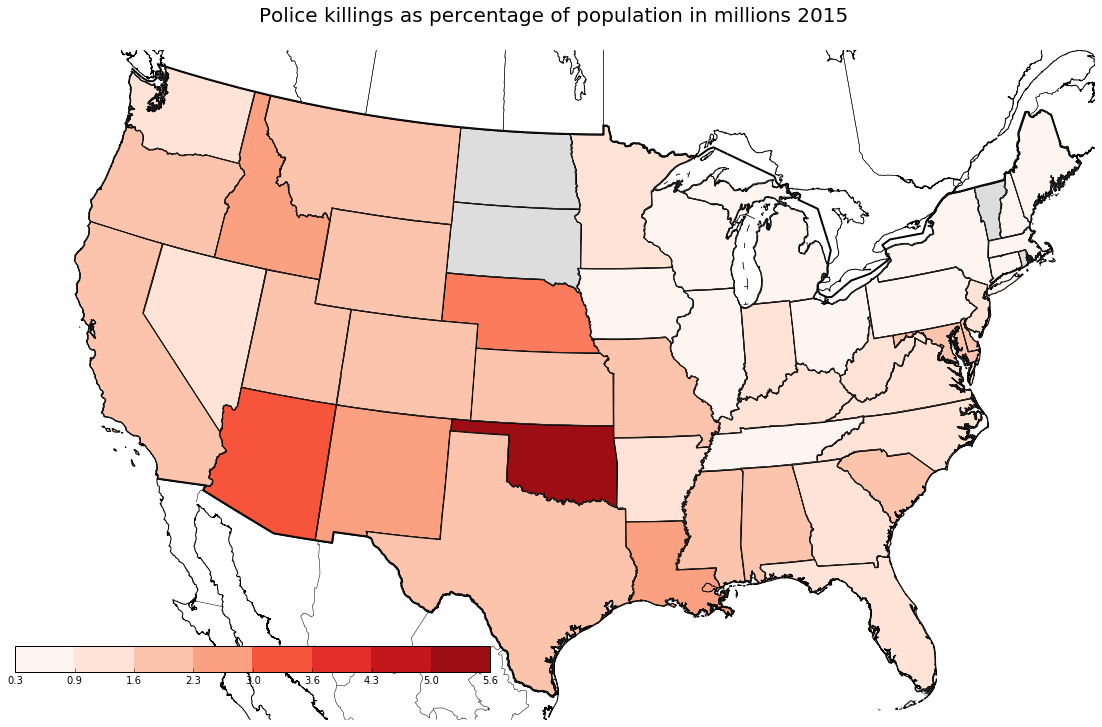

In [108]:
import re
#mpl.style.use('map')
fig = plt.figure(figsize=(22, 12))
shapefile = "/home/ashm8206/shapefile/cb_2015_us_state_500k"
ax = fig.add_subplot(111, axisbg='w', frame_on=False)
fig.suptitle('Police killings as percentage of population in millions 2015', fontsize=20, y=.95)
 
m = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64,
  urcrnrlat=49, projection='lcc', lat_1=33, lat_2=45,
  lon_0=-95, resolution='h', area_thresh=10000)
m.drawcoastlines()
m.drawcountries(linewidth=2)
m.drawstates()
AllStates=states["NAME"]
AllStates = AllStates.tolist()

#AllStates=["50","9","44","38","46"]
m.readshapefile(shapefile, 'units',color='#444444', linewidth=.2)
for info, shape in zip(m.units_info, m.units):
    iso3 = info['NAME']
    
    if iso3 not in AllStates:
        color= "#dddddd"
        
    else:
        color = scheme[int(states['bin'][states["NAME"]==iso3].head(1))]
    
    patches = [Polygon(np.array(shape), True)]
    pc = PatchCollection(patches)
    pc.set_facecolor(color)
    ax.add_collection(pc)
ax_legend = fig.add_axes([0.16, 0.18, 0.3, 0.03], zorder=3)
cmap = mpl.colors.ListedColormap(scheme)
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, ticks=bins, boundaries=bins, orientation='horizontal')
cb.ax.set_xticklabels([str(round(i, 1)) for i in bins])
    
plt.show()

**Above map is a chloropleth map for police-killings using basemap library and a ShapeFile downloaded from https://www.census.gov/geo/maps-data/data/tiger-cart-boundary.html**